### Fundamental Theorem of Asset Pricing

Central notion underlying the theorem is the concept of a *martingale* measure (i.e. a probability
measure that removes the drift from a discounted risk factor(stochastic process)). Under a martingale
measure, all risk factors drift with the risk-free rate - and not with any other market rate involving some
kind of risk premium over the risk-free short rate.

Considering a general market model *M*, according to the Fundamental Theorem of Asset Pricing,
the following three statements are equivalent:

* There are no arbitrage opportunities in the market model M
* The set Q of P-equivalent martingale measure is nonempty
* The set P of constant linear price systems is non empty

When it comes to valuation and pricing of contingent claims, the importance of the theorem
is illustrated by:

* If the market model *M* is arbitrage-free, then there exists a unique price $V_0$
    associated with any attainable contigent claim.

* It satisfies that $V_0 = E_0^Q(e^{-rT}V_T) $, where $e^{-rT}$ is the relevant risk-neutral
discount factor for a constant short rate r.

Market completness in the general market model:

* Market Model *M* is complete if it is arbitrage-free and if every contingent claim is attainable.
* Suppose that the market model M is arbitrage-free. The market model is complete if and only if M is a singleton:
i.e if there is a unique P-equivalent martingale measure.

In [11]:
import datetime as dt
import numpy as np

def get_year_deltas(date_list, day_count=365):
    """
    Function to return a vector of floats with day deltas in year fractions
    :param date_list: collection of date time objects
    :param day_count: number of days for a yer
    :return: delta_list: year fractions
    """
    start = date_list[0]
    delta_list = [(date-start).days /day_count
                  for date in date_list]
    return np.array(delta_list)

In [14]:
dates = [dt.datetime(2020, 1, 1), dt.datetime(2020, 7, 1), dt.datetime(2021, 1, 1)]
get_year_deltas(dates)

array([0.        , 0.49863014, 1.00273973])

### Constant Short Rate

The case where the short rate is contant through time - assumption made in Black-Scholes or Cox-Ross-Rubinstein

Assuming continuous discounting, as is usual for option pricing applications. In such a case, the general
discount factor as of today, given a future date *t* and a constant short rate *r* is then given by $D_0(t) = e ^{-rt}$



## Simulation Class

Code for this classes is defined in the classes folder - the process is simulating different paths for geometric brownian motion
and the plot below shows how those paths evolved over the defined time period, with different volatility settings

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path + "/classes")
os.getcwd()
print(sys.path)
module_path

['/Users/vladmatei/PycharmProjects/FinancialMathematics/notebooks', '/Users/vladmatei/PycharmProjects/FinancialMathematics', '/Users/vladmatei/opt/anaconda3/lib/python38.zip', '/Users/vladmatei/opt/anaconda3/lib/python3.8', '/Users/vladmatei/opt/anaconda3/lib/python3.8/lib-dynload', '', '/Users/vladmatei/PycharmProjects/FinancialMathematics/venv/lib/python3.8/site-packages', '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev', '/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug', '/Users/vladmatei/PycharmProjects/FinancialMathematics/classes']


'/Users/vladmatei/PycharmProjects/FinancialMathematics'

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from classes.constant_short_rate import constantShortRate
from classes.simulation_class import marketEnvironment
from classes.simulation_class import geometricBrownianMotion
from classes.simulation_class import jump_diffusion
import datetime as dt

### Using Geometirc Brownian Motion

In [5]:
def plot_simulation_results(path1, path2, legend, title=None):
    plt.figure(figsize=(12, 10))
    p1 = plt.plot(gbm.time_grid, path1[:, :10], 'b')
    p2 = plt.plot(gbm.time_grid, path2[:, :10], 'r-.')
    l1 = plt.legend([p1[0], p2[0]],
                    legend, loc=2)
    plt.gca().add_artist(l1)
    plt.xticks(rotation=30, fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(title, fontsize=20)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel("Price", fontsize=16)
    plt.show()

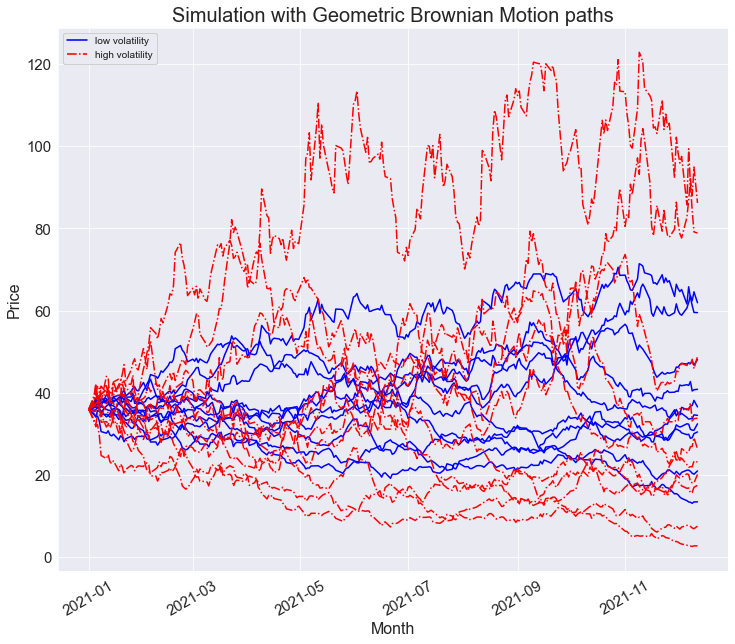

In [6]:
me_gbm = marketEnvironment('me_gbm', dt.datetime(2021, 1, 1))

me_gbm.add_constant('initial_value', 36)
low_volatility = 0.4
me_gbm.add_constant('volatility', low_volatility)
me_gbm.add_constant('final_date', dt.datetime(2021, 12, 12))
me_gbm.add_constant('currency', 'USD')
me_gbm.add_constant('frequency', 'B')
me_gbm.add_constant('paths', 10000)

csr = constantShortRate('csr', 0.06)
me_gbm.add_curve('discount_curve', csr)

# instantiate a model simulation object to work with
gbm = geometricBrownianMotion('gbm', me_gbm)
gbm.generate_time_grid()

paths_1 = gbm.get_instrument_values()

higher_volatility = 0.9
gbm.update(volatility=higher_volatility)
paths_2 = gbm.get_instrument_values()
plot_simulation_results(paths_1, paths_2, ['low volatility', 'high volatility'], 'Simulation with Geometric Brownian Motion paths')

### Jump Diffusion

Stochastic volatility and the leverage effect are stylized (empirical) facts found in a number of markets. Another important stylized fact is
the existence of *jumps* in asset prices and, for example, volatility. In 1976, Merton published his jump diffusion model, enhancing the Black-Scholes-Merton
setup through a model component generating jumps with log-normal distribution.

$
dS_t = (r-r_J)S_tdt + \sigma S_tdZ_t + J_tS_tdN_t
$

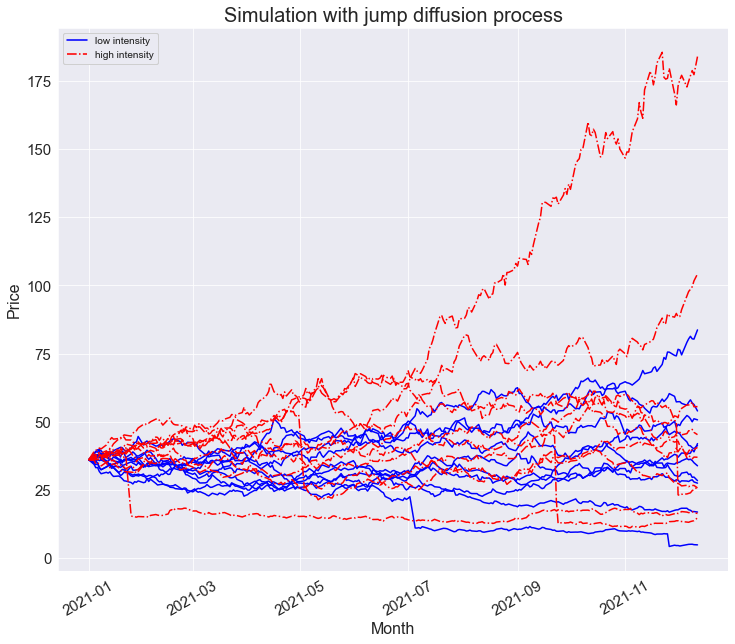

In [7]:
me_jd = marketEnvironment('me_jd', dt.datetime(2021, 1, 1))
me_jd.add_constant('lambda', 0.3)
me_jd.add_constant('mu', -0.75)
me_jd.add_constant('delta', 0.1)

me_jd.add_environment(me_gbm)

jd = jump_diffusion('jd', me_jd)

paths_3 = jd.get_instrument_values()

jd.update(lamb=0.9)

paths_4 = jd.get_instrument_values()

legend = ['low intensity', 'high intensity']
plot_simulation_results(paths_3, paths_4, legend, "Simulation with jump diffusion process")